# Clustering the Countries by using Unsupervised Learning for HELP International
by match1

Dataset Link (Kaggle): [Unsupervised Learning on Country Data](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data)

> **Objective:**
   To categorise the countries using socio-economic and health factors that determine the overall development of the country.

> **About organization:**
   HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

> **Problem Statement:**
   HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

<br>

**Attribute Information:** 
   
Column | Description
--- | ---
`country` | Name of the country
`child_mort` | Death of children under 5 years of age per 1000 live births
`exports` | Exports of goods and services per capita. Given as %age of the GDP per capita
`health` | Total health spending per capita. Given as %age of GDP per capita
`imports` | Imports of goods and services per capita. Given as %age of the GDP per capita
`Income` | Net income per person
`Inflation` | The measurement of the annual growth rate of the Total GDP
`life_expec` | The average number of years a new born child would live if the current mortality patterns are to remain the same
`total_fer` | The number of children that would be born to each woman if the current age-fertility rates remain the same
`gdpp` | The GDP per capita. Calculated as the Total GDP divided by the total population


### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

### Load the Dataset

In [2]:
countries_df = pd.read_csv("../data/Country-data.csv")

### Data Exploration and Visualization

In [3]:
countries_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
countries_df.shape

(167, 10)

In [5]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
countries_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


It can be seen that the **mean values are generally above the median (50th percentile)** which indicates that the distribution of data might be **positively skewed**.

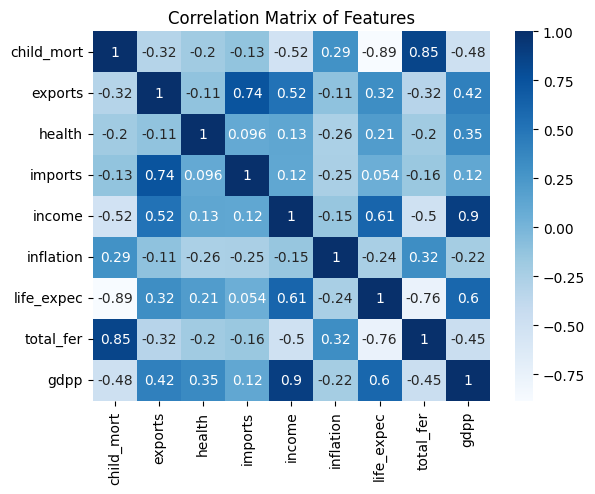

In [7]:
corr_matrix = countries_df.drop(columns=['country']).corr()
sns.heatmap(corr_matrix, annot = True, cmap='Blues')
plt.title("Correlation Matrix of Features")
plt.show()

It can be observed that there are somewhat high positive correlations for the ff:
  - total fertility rate vs child mortality (and that both have negative correlations with income & life expectancy)
  - imports vs exports
  - income vs exports
  - income vs life expectancy
  - income vs GDP per capita
  - GDP per capita vs life expectancy

Income vs Other Factors

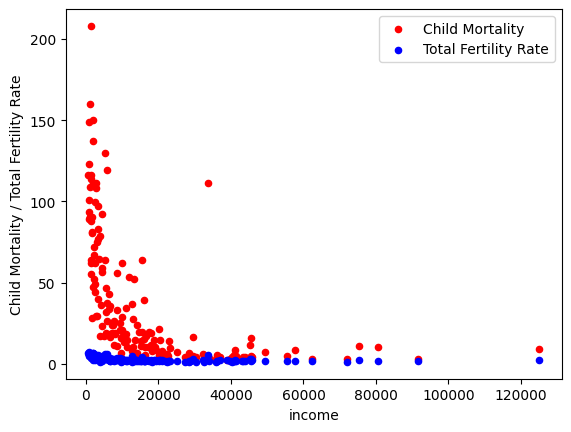

In [27]:
# feature that has a negative correlation with income
ax1 = countries_df.plot(kind = 'scatter', x = 'income', y = 'child_mort', color = 'r')
ax2 = countries_df.plot(kind = 'scatter', x = 'income', y = 'total_fer', color = 'b', ax = ax1)

plt.legend(labels = ['Child Mortality', 'Total Fertility Rate'])
plt.ylabel('Child Mortality / Total Fertility Rate') 

plt.show()

+ **As income increases, child mortality rates decrease significantly**. The red points are more scattered and lower on the y-axis as income levels rise, indicating that **wealthier regions or countries have lower child mortality rates.**

+ Beyond a certain income threshold (approximately $40,000), child mortality rates stabilize and do not show significant further decreases. This is observed in the sparse red points beyond this income level, which remain low on the y-axis.

+ Beyond a certain income level, the returns on child mortality diminish. This implies that **while income is a crucial factor, other factors become more influential at higher income levels.**

ValueError: x and y must be the same size

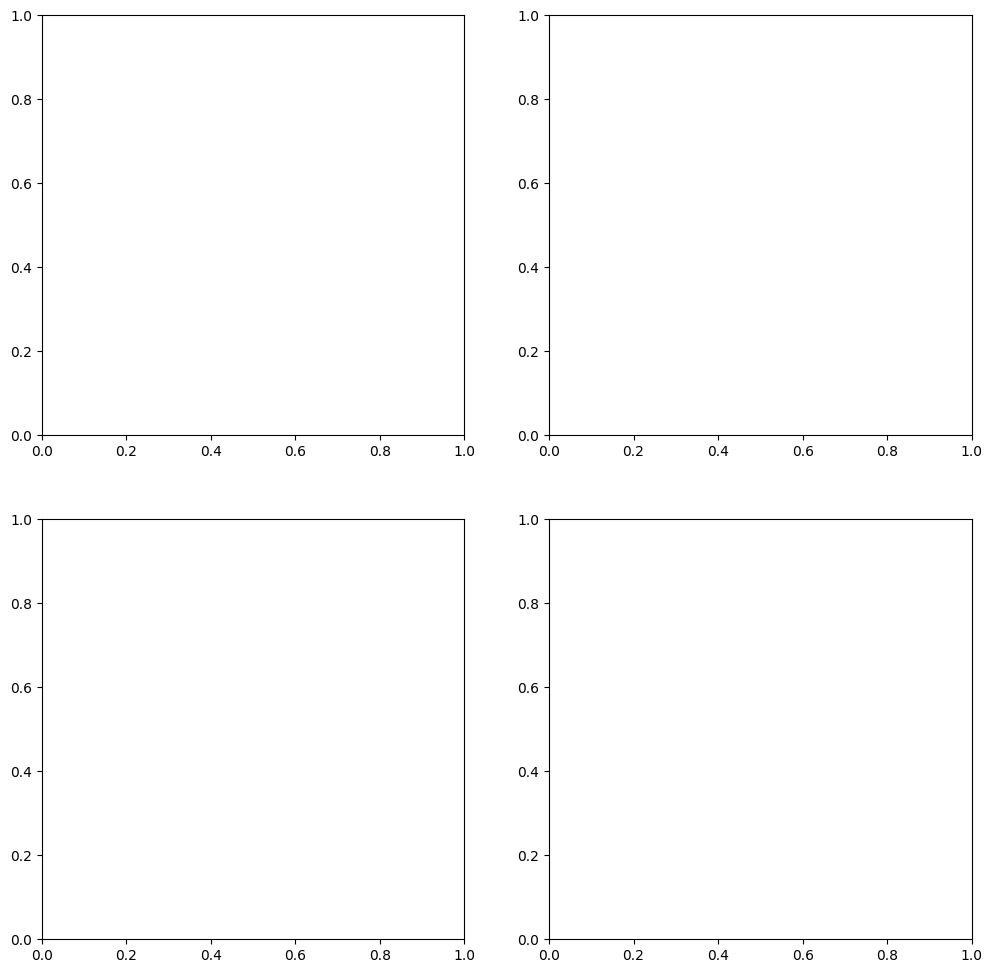

In [29]:
# Features that have high positive correlations with income
pos_cor_cols = ['exports', 'imports', 'life_expec', 'gdpp'], 
colors = ['r', 'g', 'b', 'y']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
ax = ax.flatten()

for i, (column, color) in enumerate(zip(pos_cor_cols, colors)):
    ax[i].scatter(x=countries_df['income'], y=countries_df[column], color=color, label=column)
    ax[i].set_title(f"Income vs. {column}")
    ax[i].set_xlabel('Income')
    ax[i].set_ylabel(column)
    ax[i].legend()

ax[-1].axis('off')  # Turn off the last subplot (empty)
plt.tight_layout()
plt.show()
